# Wine Type Classification

## Importing the dataset

In [71]:
# We imported these needed libraries for data manipulation, visualization and prediction

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKerasTF


In [2]:
DATA_PATH="./Data/"

In [3]:
# We get the wine data from the csv file
dfr = pd.read_csv(DATA_PATH+"winequality-red.csv",sep=';')
dfw = pd.read_csv(DATA_PATH+"winequality-white.csv",sep=';')

In [4]:
# We show the first 5 rows of red wine data then white wine
dfr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dfw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
print("Shape of red wine data: ",dfr.shape)
print("Shape of white wine data: ",dfw.shape)
print("Total number of entries: ", dfr.shape[0]+dfw.shape[0])

Shape of red wine data:  (1599, 12)
Shape of white wine data:  (4898, 12)
Total number of entries:  6497


Our dataframe is composed of 12 features and 6497 wine entries in total.

In [7]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We have 12 caracteristics of wine of type float but no red or white label.

## Preprocessing the data

In [8]:
# We add a new type column with the label
dfr["Type"]="Red"
dfw["Type"]="White"

In [9]:
# We merge the datasets into one dataframe
df= pd.concat([dfr,dfw],ignore_index=True)

In [10]:
# We encode the type label to 0 and 1 instead of red and white
df['type_enc'] = df['Type'].astype('category').cat.codes
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,type_enc
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,0


## Data Analysis and Visualization

In [11]:
# We show general statistics about each feature
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_enc
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [12]:
# Let's check how many unique values by column
for col in df.columns:
    print(f"{col} = {df[col].nunique()}")

fixed acidity = 106
volatile acidity = 187
citric acid = 89
residual sugar = 316
chlorides = 214
free sulfur dioxide = 135
total sulfur dioxide = 276
density = 998
pH = 108
sulphates = 111
alcohol = 111
quality = 7
Type = 2
type_enc = 2


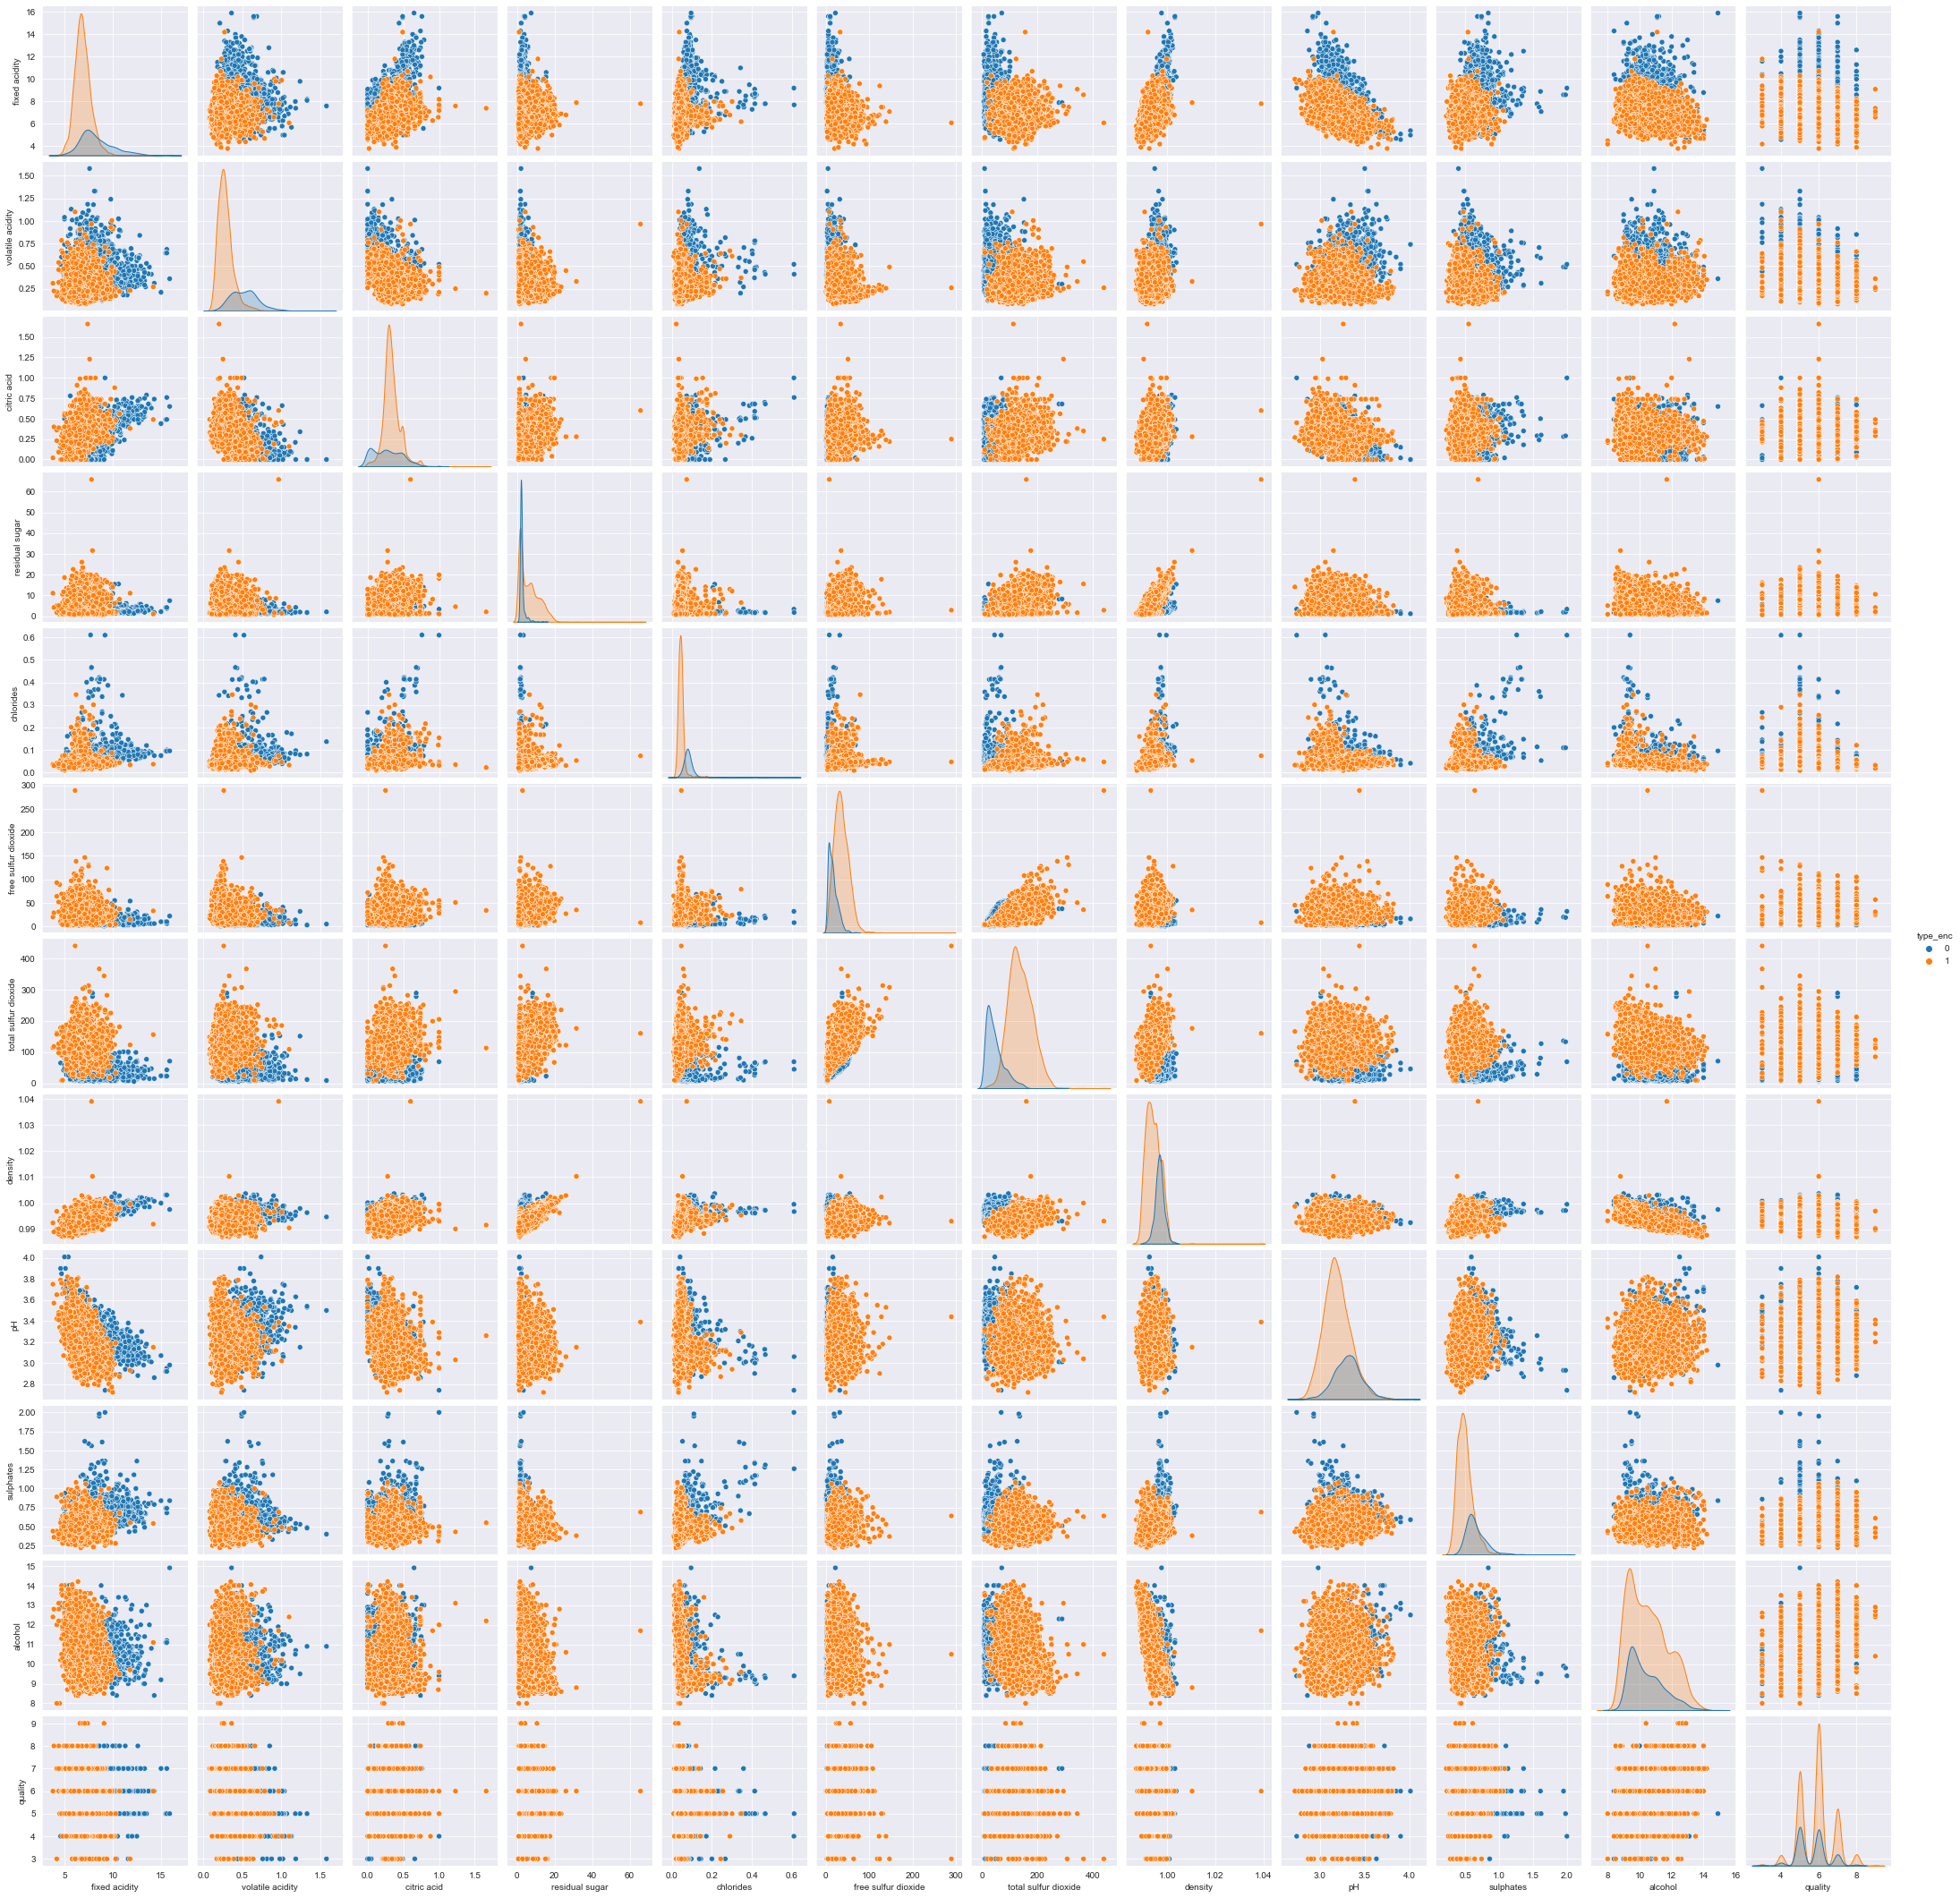

In [13]:
# We show the pair plot of each feature with the rest of features to visualize their relationships
sns.pairplot(df,hue='type_enc')

In [14]:
# We show the correlation between the different features
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_enc
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


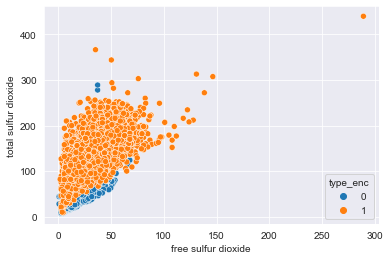

In [15]:
# We show the scatter plot of the most correlated features which are total sulfur dioxide and free sulfur dioxide
sns.scatterplot(data=df, x='free sulfur dioxide', y='total sulfur dioxide', hue='type_enc')
plt.show()

In [18]:
# We noticed there are outlier entries in the data so we're going to remove them from the dataset
q = df["total sulfur dioxide"].quantile(0.999)
df=df[df["total sulfur dioxide"] < q]

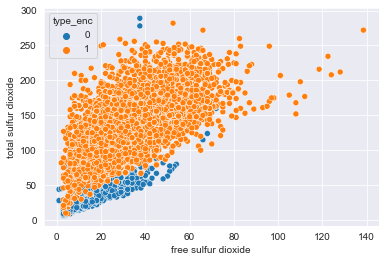

In [19]:
# Let's recheck if we removed the outliers
sns.scatterplot(data=df, x='free sulfur dioxide', y='total sulfur dioxide', hue='type_enc')
plt.show()

Text(0.5, 1.0, 'Quality')

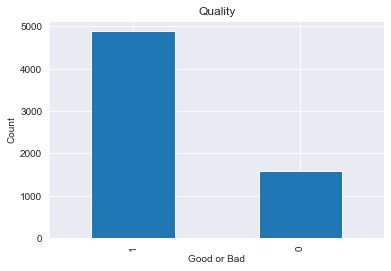

In [20]:
# We show the balance of labels with a bar plot
df.type_enc.value_counts().plot(kind='bar')
plt.xlabel("Good or Bad")
plt.ylabel("Count")
plt.title("Quality")

<AxesSubplot:title={'center':'Percentage of red and white quality wine'}, ylabel='type_enc'>

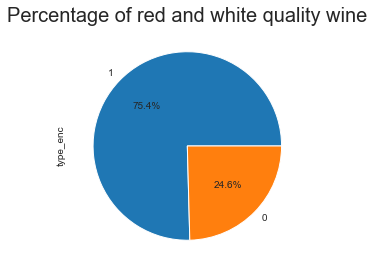

In [21]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0, bottom=0.5, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
plt.subplot(141)
plt.title('Percentage of red and white quality wine',fontsize = 20)
df['type_enc'].value_counts().plot.pie(autopct="%1.1f%%")

We conclude that we have an unbalanced dataset with far more white wine examples than red wine which will affect the model training performances.

## Preparing the model and the data for training

In [22]:
# We drop the string label
df1 = df.drop('Type',axis=1)

In [23]:
# We separate our data to X which has the features and Y which has the label
X = df1.drop('type_enc',axis=1)
Y = df1['type_enc']

In [24]:
# We split our dataset into 80% training data and 20% validation data
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=0,stratify=Y)

In [25]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (5184, 12)
X_test shape:  (1297, 12)
Y_train shape:  (5184,)
Y_test shape:  (1297,)


## 1) Implementing logistic Regression Using Sklearn

In [26]:
# We use StandardScaler to normalize the features for better and faster results
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
# We train our data
lr = LogisticRegression()
lr.fit(X_train ,y_train)

LogisticRegression()

### Logistic regression Training validation

In [28]:
# We predict the test data using the trained logistic regression model
y_pred = lr.predict(X_test)

In [31]:
# We use sklearn to get the prediction results
#print(lr.score(X_test,y_test))
lr_acc=metrics.accuracy_score(y_test,y_pred)
print("Logistic regression accuracy: ", lr_acc)

Logistic regression accuracy:  0.9938319198149576


In [32]:
# The predictions are percentages, so we convert them to 0 and 1 labels
y_pred = np.where(y_pred>0.5,1,0)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

## Analyzing the results of logisctic regression

<AxesSubplot:>

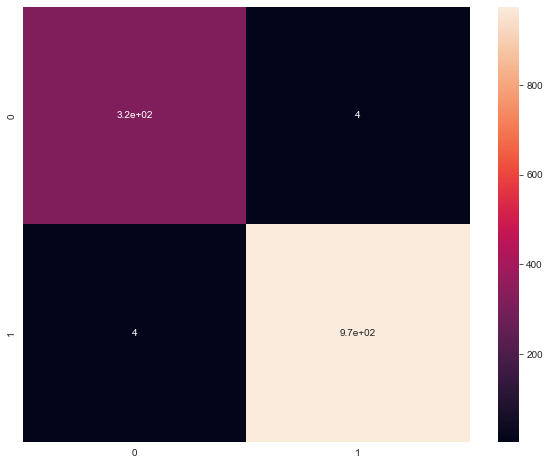

In [33]:
# We plot the confusion matrix of the predictions
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

In [35]:
# We show other classification metrics
target_names = ['Bad', 'Good']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.99      0.99      0.99       319
        Good       1.00      1.00      1.00       978

    accuracy                           0.99      1297
   macro avg       0.99      0.99      0.99      1297
weighted avg       0.99      0.99      0.99      1297



Our model did really well with 99% accuracy.

## Implementing a Neural Network using tensorflow Keras

In [59]:
#using tensorflow, we created a model with 2 dense layers
nn = Sequential()
nn.add(Input(shape=(12,)))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(16, activation='relu'))
nn.add(Dense(8, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


In [60]:
# We compile the model with log loss function for loss and Gradient Descent with Adam
nn.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

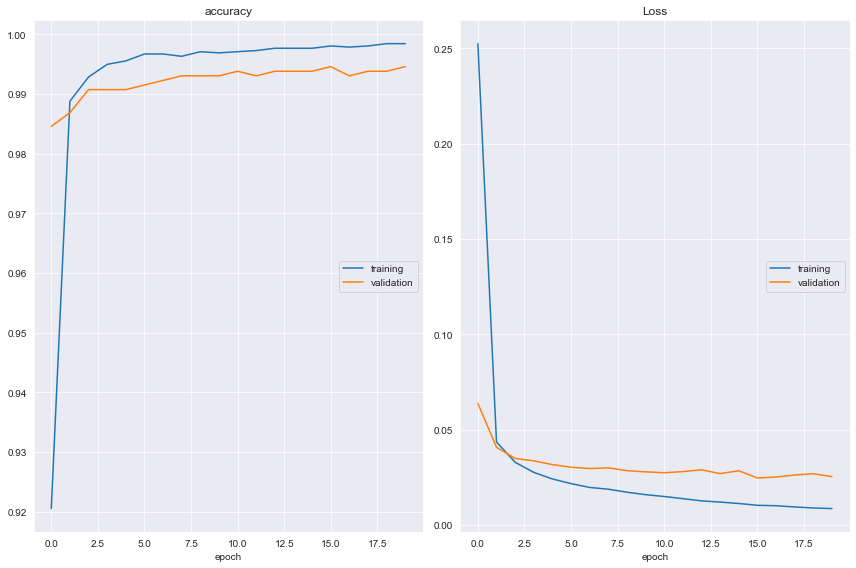

accuracy
	training         	 (min:    0.921, max:    0.998, cur:    0.998)
	validation       	 (min:    0.985, max:    0.995, cur:    0.995)
Loss
	training         	 (min:    0.009, max:    0.252, cur:    0.009)
	validation       	 (min:    0.025, max:    0.064, cur:    0.025)


In [61]:
# We train the model with 20 epochs and 32 batch size
# We used liveplotloss to visualize the accuracy during training
epochs = 20
batch_size = 32
callbacks=[PlotLossesKerasTF()]
history = nn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=callbacks)

We also achieved 99% accuracy with neural network

## Comparing inference between the models

In [67]:
# This is an example of a XXXX wine that we're going to use for inference in both models
wine=np.array([8.9, 0.22, 0.48, 1.8, 0.0077, 29.0, 60.0, 0.9968,3.39, 0.53, 9.4, 6.0]).reshape((1,-1))

In [82]:
# Logistic regression
start_time = time.time()
output=lr.predict(wine)
wineType_lr=["White", "Red"][output[0]]
execution_time_lr=time.time() - start_time

print("The type of this wine with logistic regression is "+wineType_lr+" and it took",execution_time_lr,"seconds.")


The type of this wine with logistic regression is Red and it took 0.0009777545928955078 seconds.


In [87]:
start_time = time.time()
output=nn.predict(wine)
wineType_nn=["White", "Red"][int(output[0][0])]
execution_time_nn=time.time() - start_time

print("The type of this wine with neural network is "+wineType_nn+" and it took",execution_time_nn,"seconds.")

The type of this wine with neural network is Red and it took 0.057993412017822266 seconds.


In [92]:
print("Logistic regression \t - validation accuracy: 99.3 - inference performance: 0.000977")
print("Neural network \t \t \t - validation accuracy: 99.5 - inference performance: 0.057993")
print("\nThe neural network model is more accurate but the logistic regression model is way faster at serving so we choose logistic regression")

Logistic regression 	 - validation accuracy: 99.3 - inference performance: 0.000977
Neural network 	 	 	 - validation accuracy: 99.5 - inference performance: 0.057993

The neural network model is more accurate but the logistic regression model is way faster at serving so we choose logistic regression
